In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [108]:
df = pd.read_csv('medical_examination.csv')
df.sample(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
38454,54904,20550,2,168,65.0,130,90,1,1,0,0,1,1
67397,96236,18933,2,178,105.0,140,90,3,1,0,0,1,1
50844,72547,18846,2,170,89.0,150,100,3,1,0,0,1,0
860,1197,18227,1,167,70.0,120,80,1,1,0,0,0,0
57580,82174,21977,2,150,75.0,150,90,1,1,0,0,1,1


In [109]:
df['cardio'].isnull().values.any()

False

In [110]:
# Create an 'Overweight' column
bmi = df['weight'] / (df['height'] / 100) ** 2
df['overweight'] = bmi.apply(lambda x: 0 if x <= 25 else 1)
df.sample(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
1389,1952,23532,2,162,71.0,120,80,1,1,0,0,1,0,1
21064,30090,15917,2,167,62.0,120,80,1,1,0,1,1,0,0
43556,62223,22415,2,173,63.0,110,60,1,1,0,0,1,1,0
21087,30120,22466,2,182,102.0,120,80,3,1,1,0,1,1,1
57622,82242,14691,2,166,93.0,150,90,1,2,0,0,1,1,1


In [111]:
# Normalize cholesterol and gluc
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df.sample(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
1277,1796,18758,1,171,104.0,140,90,1,1,0,0,1,1,1
49319,70427,16755,1,165,73.0,150,90,0,0,0,0,1,1,1
40035,57232,22570,1,166,79.0,100,70,0,0,0,0,1,1,1
58880,84037,17637,2,170,103.0,120,80,0,0,1,0,1,1,1
48582,69371,18962,2,170,115.0,120,80,0,0,0,0,0,1,1


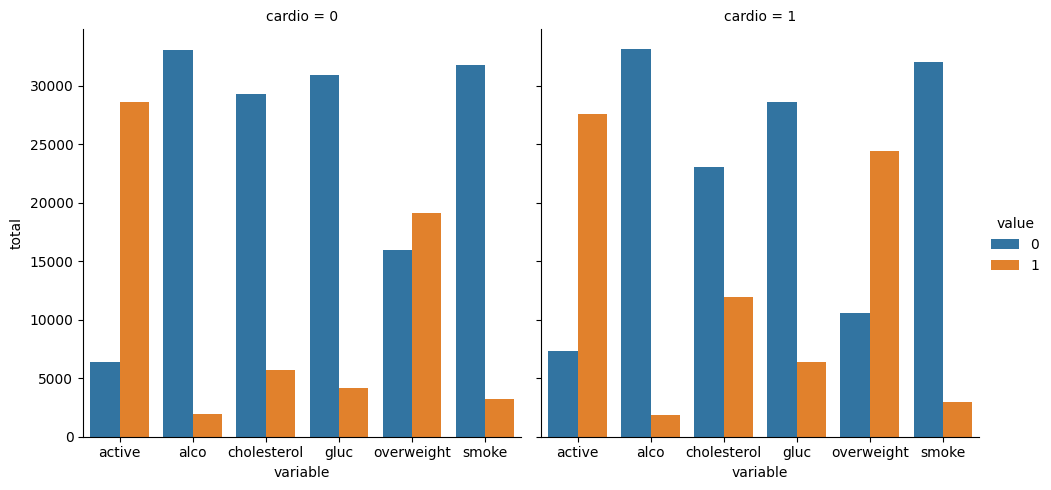

In [112]:
df2 = df.melt(id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
g = sns.catplot(data=df2, kind='count', x='variable', hue='value', col='cardio')
g.set_axis_labels("variable", "total")

In [113]:
# Clean the data
heat_df = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

In [114]:
heat_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


<AxesSubplot: >

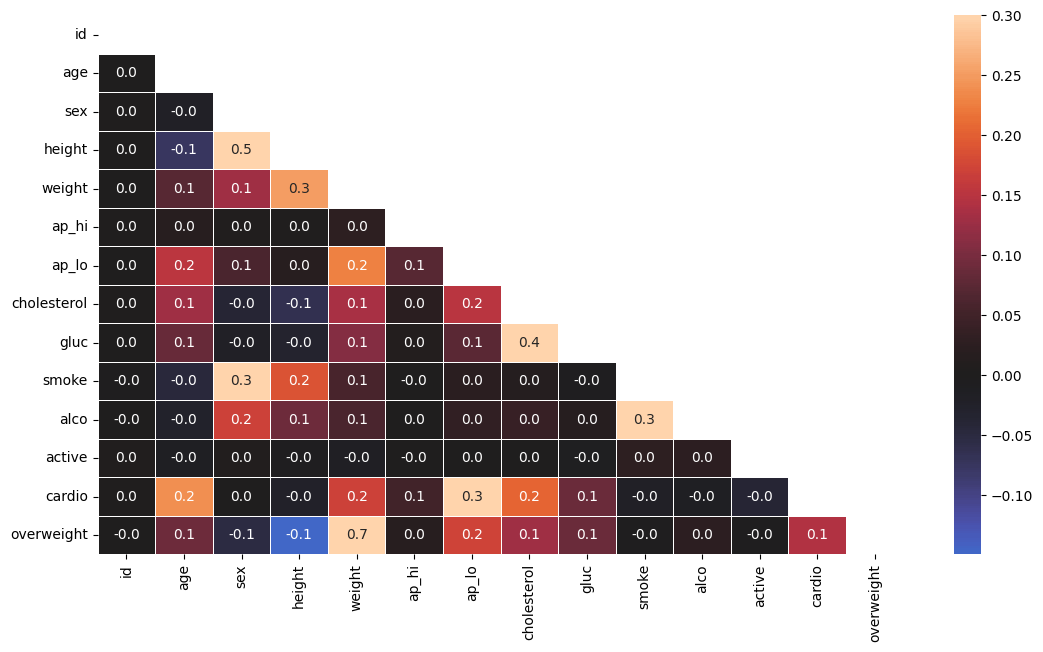

In [115]:
# Create a correlation matrix & plot a heatmap
corr_matrix = heat_df.corr()
mask_arr = np.triu(corr_matrix)
#corr_matrix
#sns.heatmap(corr_matrix, mask=mask_arr, annot=True, fmt='.1f', robust=True)
#sns.heatmap(corr_matrix, mask=mask_arr, annot=True, fmt='.1f', vmin=-0.1, vmax=0.3)
#sns.heatmap(corr_matrix, mask=mask_arr, annot=True, fmt='.1f', robust=True, vmin=-0.1)
#sns.heatmap(corr_matrix, mask=mask_arr, annot=True, fmt='.1f', robust=True, center=0)
fig, ax = plt.subplots(figsize=(13,7))
sns.heatmap(corr_matrix, mask=mask_arr, annot=True, fmt='.1f', center=0, vmax=0.3, ax=ax, linewidth=.5)